In [67]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

sns.set(style="whitegrid")


In [69]:
# Step 2: Simulating World Bank ESG data structure
esg_data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='ME'),
    'CountryCode': ['USA', 'IND', 'CHN', 'BRA', 'FRA'] * 2,
    'SeriesCode': ['ENV_CO2', 'SOC_EDU', 'GOV_COR', 'ENV_RENEW', 'SOC_HEALTH'] * 2,
    'ESGValue': np.random.rand(10) * 100,
    'Category': ['Environment', 'Social', 'Governance', 'Environment', 'Social'] * 2,
    'Description': [
        'CO2 Emissions', 'Education Index', 'Corruption Control',
        'Renewable Energy Usage', 'Health Index'] * 2
})

esg_data.head()


,Date,CountryCode,SeriesCode,ESGValue,Category,Description
0,2024-01-31,USA,ENV_CO2,82.046881,Environment,CO2 Emissions
1,2024-02-29,IND,SOC_EDU,72.096509,Social,Education Index
2,2024-03-31,CHN,GOV_COR,86.742925,Governance,Corruption Control
3,2024-04-30,BRA,ENV_RENEW,91.503530,Environment,Renewable Energy Usage
4,2024-05-31,FRA,SOC_HEALTH,1.085898,Social,Health Index


In [97]:
#  Step 3: Create Sample Data Quality Table

data_quality = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=6, freq='ME'),
    'DataSource': ['SystemA'] * 6,
    'AccurateRecords': [980, 970, 990, 985, 995, 999],
    'CompleteRecords': [970, 960, 980, 982, 990, 998],
    'ConsistentRecords': [960, 950, 970, 979, 989, 995],
    'TotalRecords': [1000] * 6
})

# Add calculated fields
data_quality['AccuracyRate'] = data_quality['AccurateRecords'] / data_quality['TotalRecords']
data_quality['CompletenessRate'] = data_quality['CompleteRecords'] / data_quality['TotalRecords']
data_quality['ConsistencyRate'] = data_quality['ConsistentRecords'] / data_quality['TotalRecords']

data_quality.head()


,Date,DataSource,AccurateRecords,CompleteRecords,ConsistentRecords,TotalRecords,AccuracyRate,CompletenessRate,ConsistencyRate
0,2024-01-31,SystemA,980,970,960,1000,0.980,0.970,0.960
1,2024-02-29,SystemA,970,960,950,1000,0.970,0.960,0.950
2,2024-03-31,SystemA,990,980,970,1000,0.990,0.980,0.970
3,2024-04-30,SystemA,985,982,979,1000,0.985,0.982,0.979
4,2024-05-31,SystemA,995,990,989,1000,0.995,0.990,0.989


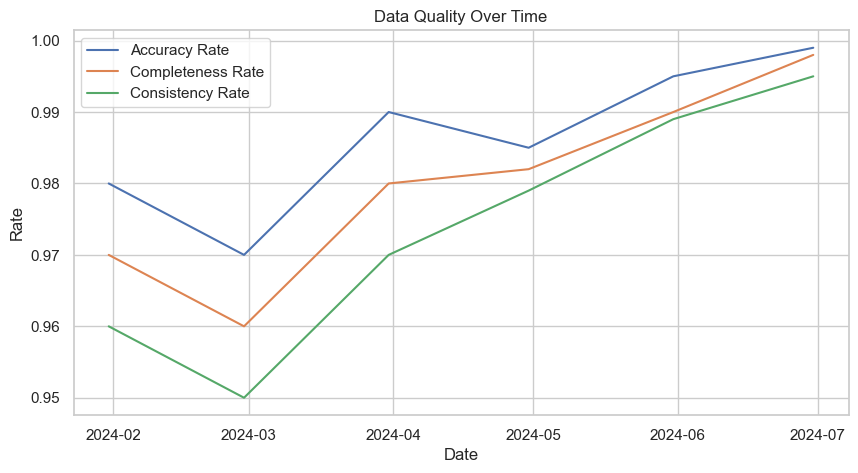

In [72]:
#  Step 4: Plot Data Quality Trends

plt.figure(figsize=(10, 5))
plt.plot(data_quality['Date'], data_quality['AccuracyRate'], label='Accuracy Rate')
plt.plot(data_quality['Date'], data_quality['CompletenessRate'], label='Completeness Rate')
plt.plot(data_quality['Date'], data_quality['ConsistencyRate'], label='Consistency Rate')
plt.title("Data Quality Over Time")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.show()


In [74]:
#  Step 5: Data Access Table

data_access = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=10),
    'User': ['UserA', 'UserB', 'UserC', 'UserD', 'UserE'] * 2,
    'Department': ['HR', 'IT', 'Finance', 'Sales', 'IT'] * 2,
    'Role': ['Analyst', 'Manager', 'Admin', 'Clerk', 'Engineer'] * 2,
    'AccessRequestID': range(1, 11),
    'RequestStatus': ['Approved'] * 8 + ['Denied'] * 2,
    'RequestDate': pd.date_range('2024-01-01', periods=10),
    'ApprovalDate': pd.date_range('2024-01-03', periods=10)
})

data_access['ApprovalTime'] = (data_access['ApprovalDate'] - data_access['RequestDate']).dt.days
data_access.head()


,Date,User,Department,Role,AccessRequestID,RequestStatus,RequestDate,ApprovalDate,ApprovalTime
0,2024-01-01,UserA,HR,Analyst,1,Approved,2024-01-01,2024-01-03,2
1,2024-01-02,UserB,IT,Manager,2,Approved,2024-01-02,2024-01-04,2
2,2024-01-03,UserC,Finance,Admin,3,Approved,2024-01-03,2024-01-05,2
3,2024-01-04,UserD,Sales,Clerk,4,Approved,2024-01-04,2024-01-06,2
4,2024-01-05,UserE,IT,Engineer,5,Approved,2024-01-05,2024-01-07,2


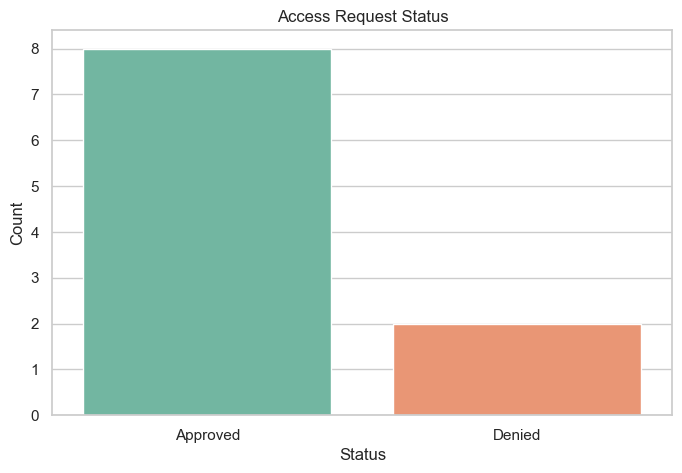

In [80]:
# Step 6: Visualize Access Requests
plt.figure(figsize=(8, 5))
sns.countplot(data=data_access, x='RequestStatus', hue='RequestStatus', palette='Set2', legend=False)
plt.title("Access Request Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()



In [82]:
# Step 7: Data Privacy Table

data_privacy = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=10),
    'User': ['UserA', 'UserB', 'UserC', 'UserD', 'UserE'] * 2,
    'DataType': ['PII', 'Health', 'Finance', 'Location', 'PII'] * 2,
    'AccessCount': np.random.randint(5, 15, size=10),
    'ComplianceStatus': ['Compliant'] * 9 + ['Non-Compliant']
})

privacy_rate = data_privacy['ComplianceStatus'].value_counts(normalize=True)['Compliant']
print(f"Privacy Compliance Rate: {privacy_rate:.2%}")


Privacy Compliance Rate: 90.00%


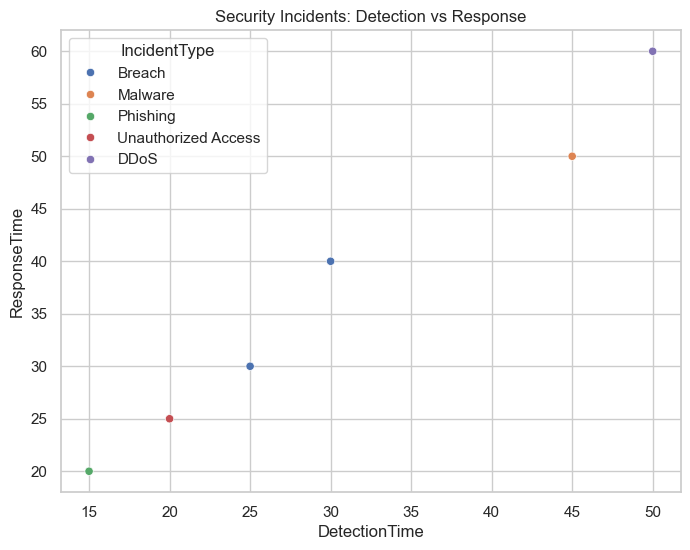

In [84]:
#  Step 8: Data Security Table

data_security = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=6),
    'IncidentID': range(101, 107),
    'IncidentType': ['Breach', 'Malware', 'Phishing', 'Unauthorized Access', 'DDoS', 'Breach'],
    'DetectionTime': [30, 45, 15, 20, 50, 25],
    'ResponseTime': [40, 50, 20, 25, 60, 30],
    'MeasuresTaken': ['MFA', 'Patch', 'Training', 'Lockout', 'Firewall', 'Audit']
})

plt.figure(figsize=(8,6))
sns.scatterplot(x='DetectionTime', y='ResponseTime', hue='IncidentType', data=data_security)
plt.title("Security Incidents: Detection vs Response")
plt.show()


In [88]:
#  Step 9: Compliance Table

compliance = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=6, freq='ME'),
    'AuditID': range(201, 207),
    'Regulation': ['GDPR', 'HIPAA', 'ISO', 'SOC2', 'PCI', 'GDPR'],
    'AuditStatus': ['Passed', 'Passed', 'Passed', 'Passed', 'Passed', 'Failed'],
    'NonComplianceCount': [0, 0, 1, 0, 0, 2]
})

compliance_rate = (compliance['AuditStatus'] == 'Passed').sum() / len(compliance)
print(f"Compliance Rate: {compliance_rate:.2%}")


Compliance Rate: 83.33%


In [90]:
# 📝 Step 10: Export the Data

# Export as .csv files 
esg_data.to_csv("esg_data.csv", index=False)
data_quality.to_csv("data_quality.csv", index=False)
data_access.to_csv("data_access.csv", index=False)
data_privacy.to_csv("data_privacy.csv", index=False)
data_security.to_csv("data_security.csv", index=False)
compliance.to_csv("compliance.csv", index=False)


In [92]:
print("🔍 Final Summary Report")
print(f"Data Accuracy Rate: {data_quality['AccuracyRate'].mean():.2%}")
print(f"Unauthorized Access Attempts (sample): {data_security[data_security['IncidentType'] == 'Unauthorized Access'].shape[0]}")
print(f"Compliance with Privacy: {privacy_rate:.2%}")
print(f"Total Data Access Requests: {len(data_access)}")
print(f"Approved Requests: {(data_access['RequestStatus'] == 'Approved').sum()}")
print(f"Compliance Audits Passed: {(compliance['AuditStatus'] == 'Passed').sum()}")
print(f"Compliance Audits Failed: {(compliance['AuditStatus'] == 'Failed').sum()}")


🔍 Final Summary Report
Data Accuracy Rate: 98.65%
Unauthorized Access Attempts (sample): 1
Compliance with Privacy: 90.00%
Total Data Access Requests: 10
Approved Requests: 8
Compliance Audits Passed: 5
Compliance Audits Failed: 1
